## Fake_News_Detection

#### Dataset Description
This dataset comprises thousands of news items labeled as "Fake" or "Real", providing a rich foundation for developing and testing machine learning models capable of identifying deceptive information. Each entry in the dataset consists of a news text and a corresponding label, offering a straightforward yet powerful resource for supervised learning projects.

### Data Fields
* Text: The full text of the news article. This field includes the body of the article, representing a mix of factual reporting, opinions, and potentially misleading information or falsehoods.
* Label: A categorical label indicating whether the news article is "Fake" or "Real". This binary classification makes it suitable for a wide range of machine learning approaches, from traditional models to advanced deep learning techniques.

### Importing Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [12]:
data = pd.read_csv(r"C:\Users\sivak\Downloads\fake_and_real_news.csv\fake_and_real_news.csv")
data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [14]:
data.describe()

,Text,label
count,9900,9900
unique,9865,2
top,Highlights: The Trump presidency on April 13 a...,Fake
freq,8,5000


The dataset has 9,900 records and 9,865 unique text entries, indicating a diverse collection of data. The label "Fake" is predominant, appearing 5,000 times, suggesting a potential focus on misinformation. The most common text appears 8 times, highlighting specific content that may need further analysis.

label
Fake    5000
Real    4900
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

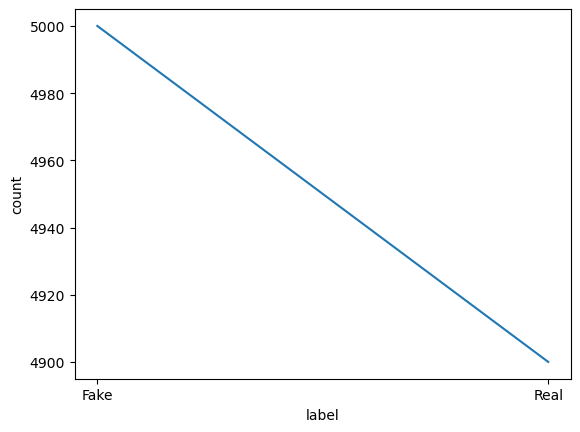

In [16]:
value_counts = data["label"].value_counts()
print(value_counts)
sns.lineplot(value_counts)

In [17]:
import re
import string
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [20]:
# Text cleaning function
def clean_data(text):  
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    stop_words = set(stopwords.words('english'))  
    return " ".join(word for word in text.split() if word not in stop_words)

In [21]:
data["cleaned_data"] = data["Text"].apply(clean_data)  # Apply text cleaning
data["label"] = data["label"].map({"Real": 1, "Fake": 0})  # Map labels to binary

### Model building

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Split the dataset into training and test sets 

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(data["cleaned_data"], data["label"], test_size=0.2, random_state=42)  

# Convert text data into TF-IDF features  
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)

#### Define models and hyperparameters for tuning 

In [27]:
 models = {  
    "Logistic Regression": (LogisticRegression(), {  
        "C": [0.1, 1, 10],  
        "max_iter": [100, 500, 1000]  
    }),  
    "Random Forest": (RandomForestClassifier(), {  
        "n_estimators": [100, 200],  
        "max_depth": [10, 20, None]  
    }),  
    "SVM": (SVC(), {  
        "C": [0.1, 1, 10],  
        "kernel": ["linear", "rbf"]  
    }),  
}

#### Perform GridSearchCV for each model and evaluate

In [29]:
best_models = {}  
best_scores = {}  
for model_name, (model, param_grid) in models.items():  
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)  
    grid_search.fit(X_train_tfidf, y_train)  
    best_models[model_name] = grid_search.best_estimator_  
    best_scores[model_name] = grid_search.best_score_ 

In [56]:
best_models

{'Logistic Regression': LogisticRegression(C=10),
 'Random Forest': RandomForestClassifier(max_depth=20),
 'SVM': SVC(C=10, kernel='linear')}

#### Model evaluation on the test set using the best Logistic Regression model as an example

In [62]:
best_model = best_models["Logistic Regression"] 
y_pred = best_model.predict(X_test_tfidf)  
accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred)

#### Output the results

In [65]:
print("Best Scores: ", best_scores)  
print("Accuracy of best models: ", accuracy)  
print("Classification Report:\n", report)  

Best Scores:  {'Logistic Regression': 0.9950757575757576, 'Random Forest': 0.9993686868686869, 'SVM': 0.9974747474747474}
Accuracy of best models:  0.9974747474747475
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



* **Logistic Regression:** Achieved a score of 99.50%.
* **Random Forest:** Performed slightly better with a score of 99.94%.
* **Support Vector Machine (SVM):** Also did well, with a score of 99.75%.

The models, especially Random Forest, show high effectiveness in distinguishing between real and fake news, making them reliable choices for fake news detection.

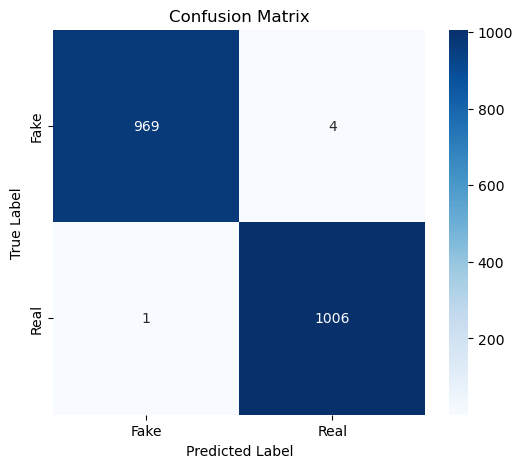

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

* The model is highly effective at distinguishing between fake and real news, with very few errors.
* Accuracy is strong, with only 5 misclassifications out of 1980 total articles (969 + 1006).
* This indicates the model’s robustness in fake news detection.